In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('NAS.csv')
df['Date'] = pd.to_datetime(df['Date'])
df

Date       Open       High        Low      Close  Adj Close  \
0    2003-12-18  19.482599  19.596901  19.025499  19.139799  19.139799   
1    2003-12-19  19.368299  19.425501  18.282801  18.454201  18.454201   
2    2003-12-22  18.739901  18.739901  17.997101  18.054300  18.054300   
3    2003-12-23  17.997101  17.997101  17.368700  17.425800  17.425800   
4    2003-12-24        NaN        NaN        NaN        NaN        NaN   
...         ...        ...        ...        ...        ...        ...   
4248 2020-10-12   0.709000   0.710000   0.650000   0.676800   0.676800   
4249 2020-10-13   0.676800   0.676800   0.600000   0.600600   0.600600   
4250 2020-10-14   0.601000   0.640000   0.596200   0.626000   0.626000   
4251 2020-10-15   0.626000   0.626000   0.585000   0.605000   0.605000   
4252 2020-10-16   0.605000   0.620000   0.601000   0.610600   0.610600   

          Volume  
0      4978496.0  
1      1410901.0  
2       137047.0  
3       229418.0  
4            NaN  
...          ...  
4248  48320475.0  
4249  47786200.0  
4250  37534949.0  
4251  26737615.0  
4252  15754218.0  

[4253 rows x 7 columns]

In [3]:
df = df.dropna()
df.loc[df['Date'] == '2016-05-20']

Date        Open        High         Low       Close   Adj Close  \
3142 2016-05-20  200.082001  201.567993  197.453995  199.339996  199.339996   

        Volume  
3142  418763.0

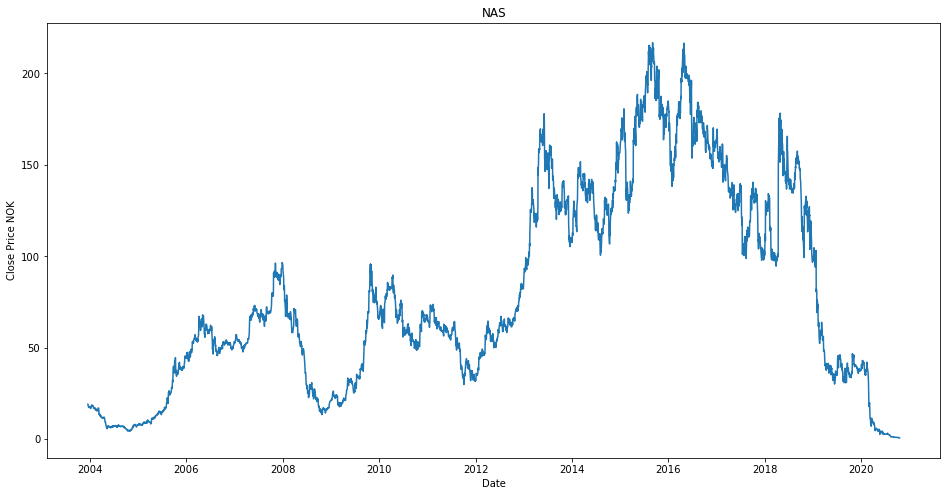

In [4]:
plt.figure(figsize=(16,8))
plt.title('NAS')
plt.xlabel('Date')
plt.ylabel('Close Price NOK')
plt.plot(df['Date'],df['Close'])
#plt.plot(df['Close'])
plt.show()

In [5]:
#Put your desired date here
inputdato = '2016-05-20'
#Put your desired amount of prediction days for the algorithm, recommended amount of days is max 25
#making it predict more days before the desired date, makes it more accurate
#We saw this from doing different tests where it was less accurate if we made it only predict 1 day
prediction_days = 25

In [6]:
#Removing all columns and focusing on the close price
#Here we are using copy because we are making a full new copy
df = df[['Date','Close']].copy()

#Here is the desired date to predict the price 
#Creating a dataframe with all the dates up to the desired date
inputdf = df[['Date','Close']].copy()
inputdf = inputdf.loc[df['Date'] <= inputdato]

In [7]:
#Here we are creating a variable for the amount of days into the future
#The purpose of this is to train the algorithm 
future_days = 25
#Here we are creating a new column for the target predictions shifted 'x' days up 
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(50)

Date   Close  Prediction
4202 2020-08-07  1.5770      1.0445
4203 2020-08-10  1.3470      1.0470
4204 2020-08-11  1.3995      1.0475
4205 2020-08-12  1.4400      1.0325
4206 2020-08-13  1.3200      1.0445
4207 2020-08-14  1.2510      1.0140
4208 2020-08-17  1.3675      1.0170
4209 2020-08-18  1.3000      1.0000
4210 2020-08-19  1.2920      0.9550
4211 2020-08-20  1.2990      0.8674
4212 2020-08-21  1.2630      0.9148
4213 2020-08-24  1.2485      0.9200
4214 2020-08-25  1.2595      0.9400
4215 2020-08-26  1.2420      1.0000
4216 2020-08-27  1.2400      1.0000
4217 2020-08-28  1.1220      0.9890
4218 2020-08-31  1.2135      0.9900
4219 2020-09-01  1.0600      0.9226
4220 2020-09-02  1.0055      0.9178
4221 2020-09-03  1.1250      0.6964
4222 2020-09-04  1.0615      0.6768
4223 2020-09-07  1.0880      0.6006
4224 2020-09-08  1.0540      0.6260
4225 2020-09-09  1.0420      0.6050
4226 2020-09-10  1.0425      0.6106
4227 2020-09-11  1.0445         NaN
4228 2020-09-14  1.0470         NaN
4229 2020-09-15  1.0475         NaN
4230 2020-09-16  1.0325         NaN
4231 2020-09-17  1.0445         NaN
4233 2020-09-21  1.0140         NaN
4234 2020-09-22  1.0170         NaN
4235 2020-09-23  1.0000         NaN
4236 2020-09-24  0.9550         NaN
4237 2020-09-25  0.8674         NaN
4238 2020-09-28  0.9148         NaN
4239 2020-09-29  0.9200         NaN
4240 2020-09-30  0.9400         NaN
4241 2020-10-01  1.0000         NaN
4242 2020-10-02  1.0000         NaN
4243 2020-10-05  0.9890         NaN
4244 2020-10-06  0.9900         NaN
4245 2020-10-07  0.9226         NaN
4246 2020-10-08  0.9178         NaN
4247 2020-10-09  0.6964         NaN
4248 2020-10-12  0.6768         NaN
4249 2020-10-13  0.6006         NaN
4250 2020-10-14  0.6260         NaN
4251 2020-10-15  0.6050         NaN
4252 2020-10-16  0.6106         NaN

In [8]:
#Here we are creating the feature data set (X) and converting it into a numpy array where we ignore the last 'x' days
#Training input X = the closing prices 25 days before the last date
X = np.array(df.drop(['Prediction','Date'], 1)) [:-future_days] #This method makes the closing values in a column
print(X)

[[19.139799]
 [18.454201]
 [18.0543  ]
 ...
 [ 1.054   ]
 [ 1.042   ]
 [ 1.0425  ]]


In [9]:
#Here we are creating the target data set (y) and converting it into a numpy array where we ignore the last 'x' days
#Training output y = the predicted prices for the 25 last days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[17.1401 17.0259 16.7973 ...  0.626   0.605   0.6106]


In [10]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [11]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [12]:
#Here the input for the prediction model is set up
#First we set it to be all the dates in the inputdataframe up to the desired amount of last days in the dataframe
#This way the model goes through the desired days until it reaches the date the user requested which is the last date in dataframe
#This makes the model more accurate to predict the last day, you can also set this to one day but will be less accurate
predictionInput = inputdf.loc[df['Date'] <= inputdato][:-(prediction_days)]
predictionInput
predictionInput = predictionInput.drop(['Date'], 1)
#Setting up the last desired days in the current predictioninput
predictionInput = predictionInput.tail(prediction_days)
predictionInput = np.array(predictionInput)
predictionInput
#test

array([[170.257996],
       [176.656998],
       [173.457993],
       [171.686996],
       [174.257996],
       [177.914001],
       [175.972   ],
       [177.856995],
       [177.399994],
       [179.800003],
       [179.970993],
       [183.970993],
       [184.598999],
       [181.285004],
       [175.343002],
       [182.199005],
       [177.972   ],
       [181.856995],
       [187.399002],
       [186.255997],
       [197.453995],
       [195.225998],
       [196.597   ],
       [195.453995],
       [202.824997]])

In [13]:
#Get the last 'x' rows/days from the feature data set
#x_future = df.drop(['Prediction','Date'], 1)[:-future_days]
#x_future = x_future.tail(future_days)
#x_future = np.array(x_future)
#x_future

In [14]:
#Creating variable for the future set
#x_future = df.drop(['Prediction','Date'], 1)
#x_future = x_future.tail(25+future_days)
#x_future = np.array(x_future)
#x_future

In [15]:
tree_prediction = tree.predict(predictionInput)
print(tree_prediction)

[172.01067067 189.112503   203.625      179.1709975  186.541504
 213.279999   153.118496   202.539001   203.966995   204.9669955
 183.856003   213.509003   165.7450025  209.738007   185.456001
 202.824997   161.8028014  199.854004   205.5955045  182.884995
 203.966995   197.225998   181.399994   168.030502   191.740997  ]


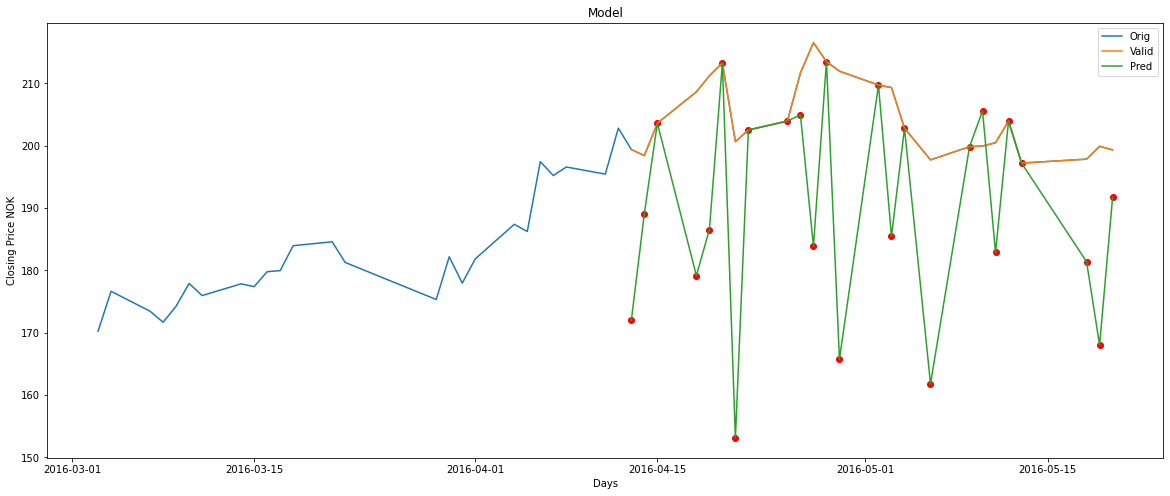

In [16]:
predictions = tree_prediction
#Here you must set valid to be the same size as the amount of days you wanted it to predict before the desired date
valid = inputdf.tail(prediction_days).copy()
valid['Actual Predictions'] = predictions
valid
plt.figure(figsize=(20,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Closing Price NOK')
plt.scatter(valid['Date'],valid['Actual Predictions'], color = 'red')
plt.plot(inputdf['Date'][-(prediction_days+25):],inputdf['Close'][-(prediction_days+25):])
plt.plot(valid['Date'],valid[['Close','Actual Predictions']])
plt.legend(['Orig','Valid','Pred'])
plt.show()

In [17]:
print("The predicted price for the date : "+inputdato+" = "+valid['Actual Predictions'].iloc[-1].astype(str))
print("The actual price on this date was : "+inputdf['Close'].iloc[-1].astype(str))
#Usikker om denne scoren er riktig enda
#Vi må finne en måte å kalkulere prediction score
#Vi kan gi den en direkte score ved å bare ta den predicta prisen og dele den på den faktiske prisen
#Men om vi skal gi en score for alle gangene den gjorde feil og riktig i løpet av prosessen må vi finne en annen måte
tree.score(x_test,y_test)

The predicted price for the date : 2016-05-20 = 191.740997
The actual price on this date was : 199.33999599999999


0.9063482771852833

In [18]:
#Here we are going to visualize the prediction
#predictions = tree_prediction

#Here we are appending 25 days into the future in the dataset
#df = df.append(pd.DataFrame({'Date': pd.date_range(start=df.Date.iloc[-1], periods=26,freq='D',closed='right')}))
#df = df.reset_index(drop=True)

#valid = df[X.shape[0]:].copy()
#valid['Predictions'] = predictions
#plt.figure(figsize=(20,8))
#plt.title('Model')
#plt.xlabel('Days')
#plt.ylabel('Closing Price NOK')
#plt.scatter(valid['Date'],valid['Predictions'], color = 'red')
#plt.plot(inputdf['Date'],inputdf['Close'])
#plt.plot(valid['Date'],valid[['Close','Predictions']])
#plt.legend(['Orig','Valid','Pred'])
#plt.show()

#As you can see the yellow line shows the actual price and the green shows the prediction
#From this we can see that the prediction is accurate when price is calm
#But at some points where the price goes up or down the algorithm isn't perfect
#The reason why the model isn't very accurate is because the price over the whole time it has existed has fluctuated alot
#especially in the last year because of the coronavirus

In [19]:
#tree_prediction = tree.predict(x_future)
#print(tree_prediction)

In [20]:
#df['Prediction'].tail(25) = valid['Predictions']

#nydf = nydf.append(pd.DataFrame({'Date': pd.date_range(start=df.Date.iloc[-1], periods=26,freq='D',closed='right')}))
#nydf = nydf.reset_index(drop=True)

#Here we are creating a variable for the amount of days into the future
#future_days = 25
#Here we are creating a new column for the target predictions shifted 'x' days up 
#nydf['Prediction'] = nydf[['Close']].shift(-future_days)
#df.tail(50)

#x1_future = nydf.drop(['Prediction','Date'], 1)
#x1_future = x_future.tail(25+future_days)
#x1_future = np.array(x_future)
#x1_future

In [21]:
#Testing input date
#inputdato = '2004-01-02'
#df.loc[df['Date'] == inputdato]
#inputdf = df.loc[df['Date'] == inputdato]
#inputdf= inputdf.drop(['Prediction', 'Date'], 1)
#inputdf = np.array(inputdf)
#inputdf

In [22]:
#inputprediction = tree.predict(inputdf)
#inputprediction

In [23]:
#df.loc[df['Date'] == '2017-05-10']

In [24]:
#inputdf = df.loc[df['Date'] == '2017-05-10']
#inputdf= inputdf.drop(['Prediction', 'Date'], 1)
#inputdf = np.array(inputdf)
#inputdf

In [25]:
#inputprediction = tree.predict(inputdf)
#inputprediction